# Model Performance and Evaluation Method: bankloan dataset

## Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('bankloan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


## Splitting data

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x=df[['employ','debtinc','creddebt','othdebt']]
y=df['default']

In [5]:
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, test_size=0.2, random_state=2020)

## Selecting the best model for benchmark

Kita ingin membandingkan performa model logreg, KNN dan decision tree pada kasus bankloan.
Untuk memilih model terbaik, kita lakukan cross validasi.


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold # mirip stratify pada train test split

from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, f1_score

### Cross Validation

In [7]:
# define model
logreg= LogisticRegression(solver='liblinear',random_state=2020)
knn=KNeighborsClassifier()
tree=DecisionTreeClassifier(max_depth=3, criterion='entropy')

In [8]:
skfold= StratifiedKFold(n_splits=5)

# cv
logreg_cv= cross_val_score(logreg, x_train,y_train, cv=skfold)
knn_cv= cross_val_score(knn, x_train,y_train, cv=skfold)
tree_cv= cross_val_score(tree, x_train,y_train, cv=skfold)


In [9]:
print('CV LogReg', logreg_cv)
print('CV KNN', knn_cv)
print('CV Tree', tree_cv)
# karena default, metrik yang digunakan adalah akurasi

CV LogReg [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV KNN [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV Tree [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


In [10]:
# untuk membandingkan score, pakai rata-rata
print('CV LogReg mean', logreg_cv.mean())
print('CV KNN mean', knn_cv.mean())
print('CV Tree mean', tree_cv.mean())
#logred memiliki rata-rata akurasi paling tinggi

CV LogReg mean 0.8
CV KNN mean 0.7428571428571429
CV Tree mean 0.7714285714285716


In [11]:
#untuk melihat seberapa stabil model, pakai standard deviasi
print('CV LogReg std', logreg_cv.std())
print('CV KNN std', knn_cv.std())
print('CV Tree std', tree_cv.std())
#logreg paling stabil

# kalau berdasarkan metrik akurasi, pilih logreg, karena rata-rata score paling tinggi, dengan stdd rendah (stabil)

CV LogReg std 0.020824828195876083
CV KNN std 0.024872121923543065
CV Tree std 0.057753434388557956


sebelum melakukan pemilihan model, kita perlu menentukan metrik evaluasi yang sesuai dengan kebutuhan bisnis kita. Pada kasus bankloan, FN lebih merugikan (kita akan memberikan pinjaman pada orang yang tidak mampu membayar), sehingga metrik evaluasi yang sesuai adalah **Recall**.

In [12]:
logreg_cv= cross_val_score(logreg, x_train,y_train, cv=skfold, scoring='recall')
knn_cv= cross_val_score(knn, x_train,y_train, cv=skfold, scoring='recall')
tree_cv= cross_val_score(tree, x_train,y_train, cv=skfold, scoring='recall')

In [13]:
print('CV LogReg', logreg_cv)
print('CV KNN', knn_cv)
print('CV Tree', tree_cv)

CV LogReg [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV KNN [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV Tree [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


In [14]:
print('CV LogReg mean', logreg_cv.mean())
print('CV KNN mean', knn_cv.mean())
print('CV Tree mean', tree_cv.mean())
# logreg memiliki rata-rata score paling tinggi

CV LogReg mean 0.46551724137931033
CV KNN mean 0.3213793103448276
CV Tree mean 0.4577011494252874


In [15]:
print('CV LogReg std', logreg_cv.std())
print('CV KNN std', knn_cv.std())
print('CV Tree std', tree_cv.std())
# Model yang paling stabil adalah KNN, tapi juga logreg relatif stabil, sehingga kita bisa memilih logreg sebagai
# model benchmark

CV LogReg std 0.08992003317520893
CV KNN std 0.06021759987018779
CV Tree std 0.13481616986286768


### Cross validation in a function

In [16]:
def model_evaluation_cv(model, metric):
    skfold=StratifiedKFold(n_splits=5)
    return cross_val_score(model, x_train,y_train, cv=skfold, scoring=metric)

In [17]:
def print_result(model_cv):
    print('cv score', model_cv)
    print('cv mean', model_cv.mean())
    print('cv std', model_cv.std())

In [18]:
logreg_f1=model_evaluation_cv(logreg,'f1')

In [19]:
print_result(logreg_cv)

cv score [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
cv mean 0.46551724137931033
cv std 0.08992003317520893


## Model Performance in testset  
dari hasil cross validasi, kita memilih logreg sebagai model benchmark kita. Sekarang, coba kita lihat performa model logreg pada data test

In [20]:
import seaborn as sns

In [21]:
logreg= LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train) #fitting dengan keseluruhan data train dan validasi

LogisticRegression(solver='liblinear')

In [22]:
y_pred=logreg.predict(x_test)
y_proba= logreg.predict_proba(x_test) #probability masuk ke kelas 0 dan 1

In [23]:
y_proba[:5]

array([[0.40828766, 0.59171234],
       [0.68571017, 0.31428983],
       [0.68904231, 0.31095769],
       [0.59063276, 0.40936724],
       [0.75999527, 0.24000473]])

In [24]:
# cek score
print('recall', recall_score(y_test,y_pred))
print('precision', precision_score(y_test,y_pred))
print('f1', f1_score(y_test,y_pred))

recall 0.4864864864864865
precision 0.782608695652174
f1 0.6000000000000001


In [25]:
print(classification_report(y_test,y_pred)) #summary metrik evaluasi clasifikasi

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


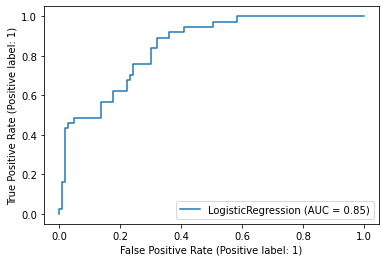

In [27]:
plot_roc_curve(logreg,x_test,y_test)

In [28]:
roc_auc_score(y_test,y_proba[:,1])

0.8475465757019154

In [29]:
# nilai fpr, tpr di berbagai macam threshold
fpr,tpr, threshold=roc_curve(y_test,y_proba[:,1], pos_label=1)

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


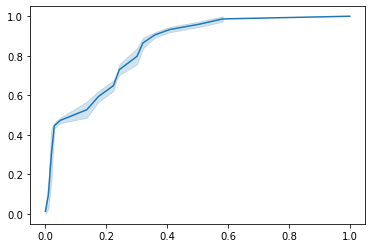

In [30]:
sns.lineplot(fpr,tpr)

In [31]:
pd.set_option('display.max_rows',None)
pd.DataFrame({
    'fpr':fpr,
    'tpr':tpr,
    'threshold':threshold
})

,fpr,tpr,threshold
0,0.000000,0.000000,1.945205
1,0.000000,0.027027,0.945205
2,0.009709,0.027027,0.934398
3,0.009709,0.162162,0.733896
4,0.019417,0.162162,0.691082
5,0.019417,0.432432,0.543320
6,0.029126,0.432432,0.525365
7,0.029126,0.459459,0.523860
8,0.048544,0.459459,0.508879
9,0.048544,0.486486,0.501574


C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


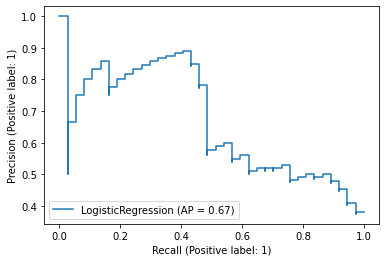

In [32]:
#PR Curve
plot_precision_recall_curve(logreg,x_test,y_test)

In [33]:
average_precision_score(y_test,y_proba[:,1])

0.666232963658068

In [34]:
p,r,t=precision_recall_curve(y_test,y_proba[:,1])

In [35]:
t=list(t)
t.insert(0,0) #panjang threshold kurang 1, tambahkan nilai 0 di awal

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


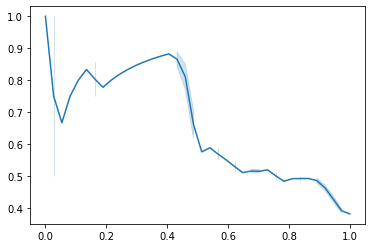

In [36]:
sns.lineplot(r,p)

In [37]:
pd.DataFrame({
    'precision':p,
    'recall':r,
    'threshold':t
})

,precision,recall,threshold
0,0.381443,1.000000,0.000000
1,0.375000,0.972973,0.100907
2,0.378947,0.972973,0.105802
3,0.382979,0.972973,0.105869
4,0.387097,0.972973,0.106504
5,0.391304,0.972973,0.111974
6,0.395604,0.972973,0.115053
7,0.400000,0.972973,0.119980
8,0.404494,0.972973,0.121079
9,0.409091,0.972973,0.135460


# Hyperparameter Tunning

## Simple hyperparameter tunning

In [38]:
# data train akan kita bagi menjadi data train2 dan val
x_train2, x_val, y_train2, y_val=train_test_split(x_train,y_train, stratify=y_train, test_size=0.25, random_state=2020)
# 25% dari 80% atau 20% dari data awal

In [39]:
#tanpa cross validasi
hyperparam=[1000,500,100,50,10,5,1,0.5,0.1,0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

best_score=0
training_score=[]
validation_score=[]

for i in hyperparam:
    logreg= LogisticRegression(C=i, solver='liblinear', random_state=2020)
    logreg.fit(x_train2,y_train2)
    y_pred_train=logreg.predict(x_train2)
    training_score.append(f1_score(y_train2,y_pred_train))
    
    y_pred_val= logreg.predict(x_val)
    score=f1_score(y_val,y_pred_val)
    validation_score.append(score)
    
    if score>best_score:
        best_score=score
        best_param=i

In [40]:
# dengan cross validasi
hyperparam=[1000,500,100,50,10,5,1,0.5,0.1,0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
skfold=StratifiedKFold(n_splits=5)
best_score=0
cv_score_val=[]

for i in hyperparam:
    logreg= LogisticRegression(C=i, solver='liblinear', random_state=2020)
    cv_score= cross_val_score(logreg,x_train,y_train, cv=skfold, scoring='f1').mean()
    cv_score_val.append(cv_score)
    
    if cv_score>best_score:
        best_score=cv_score
        best_param_cv=i

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


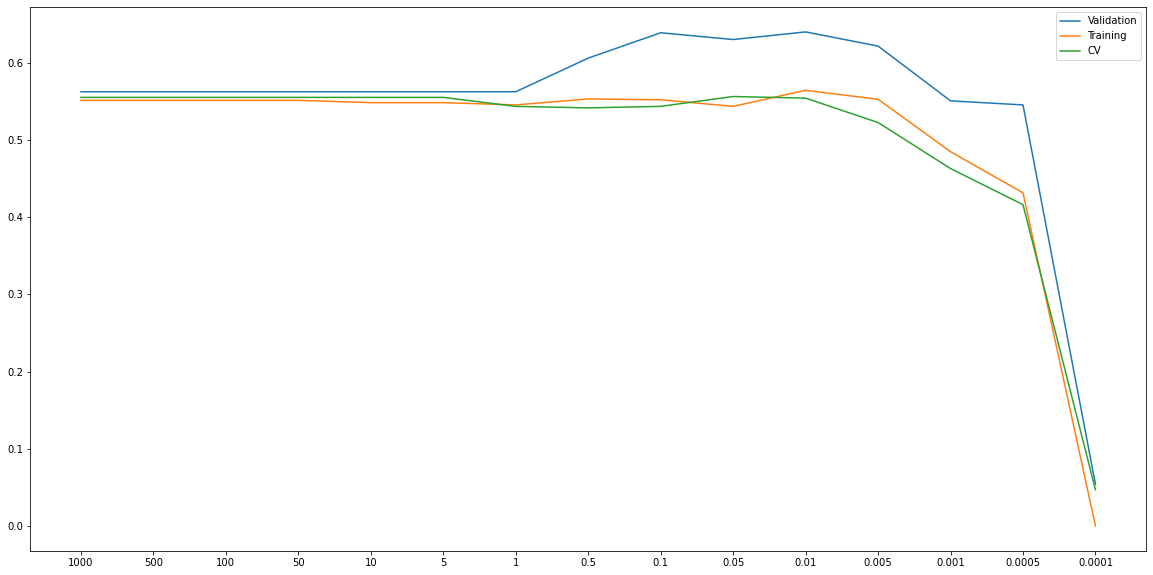

In [41]:
import matplotlib.pyplot as plt
length=range(len(hyperparam))
plt.figure(figsize=(20,10))
sns.lineplot(length, validation_score)
sns.lineplot(length, training_score)
sns.lineplot(length,cv_score_val)

plt.legend(['Validation', 'Training', 'CV'])
plt.xticks(length, hyperparam)
plt.show()

In [42]:
best_param

0.01

In [43]:
best_param_cv,best_score # best param, dengan dan tanpa cross validasi berbeda
# tanpa cross validasi, bisa jadi kita memilih model yang kurang tepat/kebetulan bagus

(0.05, 0.5563225088777649)

### Before and After Tunning

In [44]:
# Before tunning
logreg=LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
y_pred= logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [45]:
# After tunning
logreg=LogisticRegression(solver='liblinear',C=best_param_cv)
logreg.fit(x_train,y_train)
y_pred= logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



Setelah dilakukan hyperparameter tunning, performa model (f1) malah turun dari 60% menjadi 58%. Ini bisa terjadi karena:  
* Peningkatan oleh hyperparameter tunning tidak signifikan
* range hyperparameter yang dipilih menyebabkan overfitting/underfiting

Solusi:
* ganti model
* feature engineering
* tambah hyperparameter (kita akan mencoba yang ini)

## Grid Search
mencoba semua kombinasi parameter yang dimasukkan

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
hyperparam_space={
    'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], #benchmark: C=1 dan 0.05
    'max_iter':[100,200,300,400,500,1000] #benchmark 100
}

C= 15 parameter  
max_iter= 6 parameter  
cv= 5 fold  
jadi, ketika kita memakai grid search, model akan ditraining sebanyak 15x6x5=450 kali

In [48]:
skfold= StratifiedKFold(n_splits=5)
logreg= LogisticRegression(solver='liblinear', random_state=2020)
grid_search= GridSearchCV(
    logreg, #model to tune
    param_grid=hyperparam_space, #hyperparameter yang ingin dicoba
    cv=skfold,
    scoring='f1',
    n_jobs= -1 #menggunakan semua cores komputer agar grid search berjalan lebih cepat
    #kalau ram tidak kuat matikan parameter yang ini
)

In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1')

In [50]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)  

best score 0.5563225088777649
best param {'C': 0.05, 'max_iter': 100}


In [51]:
pd.DataFrame(grid_search.cv_results_) #score dari semua kombinasi

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010969,1.181010e-03,0.006907,8.257996e-04,1000,100,"{'C': 1000, 'max_iter': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
1,0.011682,3.438871e-03,0.005696,8.471024e-04,1000,200,"{'C': 1000, 'max_iter': 200}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
2,0.009200,2.223495e-03,0.004705,9.334023e-04,1000,300,"{'C': 1000, 'max_iter': 300}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
3,0.011459,3.871476e-03,0.005404,4.677445e-04,1000,400,"{'C': 1000, 'max_iter': 400}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
4,0.006831,7.555277e-04,0.005693,9.160184e-04,1000,500,"{'C': 1000, 'max_iter': 500}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
5,0.009446,1.588081e-03,0.006501,1.277417e-03,1000,1000,"{'C': 1000, 'max_iter': 1000}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
6,0.007211,7.187297e-04,0.005983,1.544864e-03,500,100,"{'C': 500, 'max_iter': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
7,0.008775,2.630561e-03,0.004987,6.675720e-07,500,200,"{'C': 500, 'max_iter': 200}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
8,0.007598,1.285695e-03,0.006075,1.495686e-03,500,300,"{'C': 500, 'max_iter': 300}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
9,0.008240,1.314553e-03,0.005394,1.341424e-03,500,400,"{'C': 500, 'max_iter': 400}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7


Hasil yang diberikan oleh grid search sama dengan hasil sebelumnya, yaitu C=0.05 dan max iter=100. Jadi, tidak ada efek penambahan parameter max iter. Kita bisa mencoba menambahkan parameter lain, mencoba metode machine learning lain atau mencoba feature engineering.

In [52]:
# before vs after tunning

In [53]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [54]:
logreg= grid_search.best_estimator_
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



# Latihan
Dengan menggunakan data titanic:  
* x= *sex*, age, fare, *class*, *embark_town*, *alone*  
* y= alive/survived
* test size 0.2
* random state 2020


Dan skema preprocesing berikut:
* simple imputer most frequent: embark town
* simple imputer median: age
* onehot: sex, embark town, alone  
* ordinal: class
* optional khusus KNN: fare, age: robust scaling  


pilih model terbaik di antara model berikut dengan metrik evaluasi yang menurut kalian paling sesuai:
    * logistic regression
    * knn classifier
    * decision tree classifier (max depth =3)

In [55]:
titanic=sns.load_dataset('titanic')

In [56]:
x=titanic[['sex','age','fare','class','embark_town', 'alone']]
y=titanic['survived']

In [57]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=y, random_state=2020)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce

In [59]:
x['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [60]:
# Transformer
pipe_onehot= Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])
ordinal_mapping = [
    {'col':'class',
    'mapping':{None:0,'First':1,'Second':2,'Third':3}}
    ]

transformer=ColumnTransformer([
    ('onehot',pipe_onehot,['sex', 'embark_town', 'alone']),
    ('ordinal',ce.OrdinalEncoder(mapping = ordinal_mapping),['class']),
    ('impute', SimpleImputer(strategy='median'),['age'])
], remainder='passthrough')

In [61]:
x_train_preprocess=pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocess=pd.DataFrame(transformer.transform(x_test))

In [62]:
features=list(transformer.transformers_[0][1][1].get_feature_names_out())+['class','age','fare']

In [63]:
x_train_preprocess.columns=features
x_test_preprocess.columns=features

In [64]:
# optional
# Transformer
pipe_onehot= Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])
pipe_scaling= Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', RobustScaler())
])
ordinal_mapping = [
    {'col':'class',
    'mapping':{None:0,'First':1,'Second':2,'Third':3}}
    ]

transformer2=ColumnTransformer([
    ('onehot',pipe_onehot,['sex', 'embark_town', 'alone']),
    ('ordinal',ce.OrdinalEncoder(mapping = ordinal_mapping),['class']),
    ('scaling', pipe_scaling,['age','fare'])
], remainder='passthrough')

In [65]:
x_train_preprocess2=pd.DataFrame(transformer2.fit_transform(x_train),columns=features)
x_test_preprocess2=pd.DataFrame(transformer2.transform(x_test),columns=features)

In [66]:
x_train_preprocess2.head()

,x0_male,x1_Queenstown,x1_Southampton,x2_True,class,age,fare
0,1.0,0.0,1.0,1.0,2.0,2.000000,-0.049683
1,1.0,0.0,1.0,1.0,3.0,-0.461538,-0.249085
2,1.0,1.0,0.0,1.0,3.0,0.076923,-0.298935
3,1.0,0.0,1.0,1.0,1.0,0.000000,0.608343
4,1.0,1.0,0.0,0.0,3.0,0.923077,0.010138


In [67]:
# cross val
logreg=LogisticRegression(max_iter=1000)
tree=DecisionTreeClassifier(max_depth=3)
knn=KNeighborsClassifier()

In [68]:
def model_evaluation_cv(model, metric,x,y):
    skfold=StratifiedKFold(n_splits=5)
    cv=cross_val_score(model, x,y, cv=skfold, scoring=metric)
    return cv,cv.mean(),cv.std()

In [69]:
logreg_cv,logreg_mean,logreg_std=model_evaluation_cv(logreg,'precision',x_train_preprocess,y_train)

In [70]:
tree_cv,tree_mean,tree_std=model_evaluation_cv(tree,'precision',x_train_preprocess,y_train)

In [71]:
knn_cv,knn_mean,knn_std=model_evaluation_cv(knn,'precision',x_train_preprocess2,y_train)

In [72]:
pd.DataFrame(zip([logreg_mean,tree_mean,knn_mean],[logreg_std,tree_std,knn_std]), columns=['mean','std'],index=['logreg','tree','knn'])

,mean,std
logreg,0.752064,0.066252
tree,0.794540,0.038664
knn,0.748247,0.042495


In [73]:
# tree memiliki rata2 tertinggi dengan std paling rendah

In [74]:
#evaluasion with test set
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(x_train_preprocess,y_train)
print(classification_report(y_test,tree.predict(x_test_preprocess)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



# Latihan 2
Melanjutkan dari latihan di atas dengan data titanic dari seaborn.  
* x= *sex*, age, fare, *class*, *embark_town*, *alone*  
* y= alive/survived
* test size 0.2
* random state 2020


Dan skema preprocesing berikut:
* simple imputer most frequent: embark town
* simple imputer median: age
* onehot: sex, embark town, alone  
* ordinal: class

Coba lakukan hyperparameter tunning menggunakan gridsearch.
* benchmark model: decision tree classifier dengan max depth=3  
* metric evaluasi= Presicion
* masukkan random state 2020 pada model yang ditunning

Pilih hyperparameter yg menurut kalian sesuai, coba buat model dengan hasil evaluasi sebaik mungkin.
* max depth
* min sample leaf
* min sample split
* criterion



In [92]:
hyperparam_space={
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[2,5,10,15,25,50,75,85,100,200,300],
    'min_samples_leaf':[1,2,5,10,15,25,50,75,100,200,300],
    'criterion':['entropy','gini']
}

In [93]:
skfold= StratifiedKFold(n_splits=5)
tree=DecisionTreeClassifier(max_depth=3,random_state=2020)
grid_search= GridSearchCV(
    tree, 
    param_grid=hyperparam_space, 
    cv=skfold,
    scoring='precision',
    n_jobs= -1 
)

In [94]:
grid_search.fit(x_train_preprocess,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2020),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 25, 50, 75, 100,
                                              200, 300],
                         'min_samples_split': [2, 5, 10, 15, 25, 50, 75, 85,
                                               100, 200, 300]},
             scoring='precision')

In [95]:
grid_search.best_params_,grid_search.best_score_ 

({'criterion': 'entropy',
  'max_depth': 2,
  'min_samples_leaf': 50,
  'min_samples_split': 2},
 0.9038993505611261)

In [96]:
# before vs after
tree= DecisionTreeClassifier(max_depth=3)
tree.fit(x_train_preprocess,y_train)
print(classification_report(y_test,tree.predict(x_test_preprocess)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



In [97]:
tree= grid_search.best_estimator_
tree.fit(x_train_preprocess,y_train)
print(classification_report(y_test,tree.predict(x_test_preprocess)))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       110
           1       0.92      0.35      0.51        69

    accuracy                           0.74       179
   macro avg       0.81      0.66      0.66       179
weighted avg       0.79      0.74      0.70       179

